# Cell-type specificity of RTE expression in normal brain samples
This script explores cell-type specificity of RTE expresion, corresponding to Figure 3, Supplemental Figure S2,S3 <br>
Author: Wankun Deng
Email: dengwankun@hotmail.com
GitHub: https://github.com/wkdeng

In [ ]:
%load_ext rpy2.ipython
import os
os.chdir('scRTE/scripts')
from common import *
load_sc_data()

In [ ]:
%%R
if(getwd()!='/home/wdeng3/workspace/Codespace/scRTE/scripts'){
    setwd('/home/wdeng3/workspace/Codespace/scRTE/scripts')
}
source('common.r')

## Cell type specific

### Find markers in Control samples (AD_HS_00003.1 SFG)

In [ ]:
sfg_ad=all_dfs['AD_HS_00003.1'].copy()
sfg_umap=all_cell_umaps['AD_HS_00003.1'].copy()

sfg_ad['Diagnosis']=sfg_umap['Diagnosis']
sfg_ad['predicted.celltype']=sfg_umap['predicted.celltype']
sfg_ad['UMAP_1']=sfg_umap['UMAP_1']
sfg_ad['UMAP_2']=sfg_umap['UMAP_2']

# adata=anndata.AnnData(X=np.expm1(sfg_ad.iloc[:,:-4]))
ctrls=sfg_ad.loc[sfg_ad['Diagnosis']=='Control',:]
ctrls[['SLC17A7','GAD1','MBP','PDGFRA','AQP4','LTR86B2','MER83B','UMAP_1','UMAP_2','predicted.celltype']].to_csv('../data/analysis/ctrls_ad3.1.txt',sep='\t',header=True,index=True)

adata=anndata.AnnData(X=ctrls.iloc[:,:-4])

adata.obs['Diagnosis']=ctrls['Diagnosis']
adata.obs['CellType']=ctrls['predicted.celltype']
adata.obsm['X_umap']=ctrls[['UMAP_1','UMAP_2']].to_numpy()
adata.var["mito"] = adata.var_names.str.startswith("MT-")
adata.layers["counts"] = adata.X.copy()
sc.pp.calculate_qc_metrics(adata, qc_vars=["mito"], inplace=True)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

ctrls_rtes=ctrls.loc[:,[x for x in ctrls.columns if x in rtes]]
ctrls_rtes=pd.concat([ctrls_rtes,ctrls[['Diagnosis','predicted.celltype','UMAP_1','UMAP_2']]],axis=1)
ctrls_rtes.loc[ctrls_rtes['predicted.celltype']=='Ex','predicted.celltype']='Neuron'
ctrls_rtes.loc[ctrls_rtes['predicted.celltype']=='In','predicted.celltype']='Neuron'  
ctrls_rtes=ctrls_rtes.loc[ctrls_rtes['predicted.celltype']!='Endo',:]
ctrls_rtes=ctrls_rtes.loc[ctrls_rtes['predicted.celltype']!='Mic',:]
ctrls_rtes=ctrls_rtes.loc[ctrls_rtes['predicted.celltype']!='VLMC',:]


adata_rtes=anndata.AnnData(X=ctrls_rtes.iloc[:,:-4])
adata_rtes.obs['Diagnosis']=ctrls_rtes['Diagnosis']
adata_rtes.obs['CellType']=ctrls_rtes['predicted.celltype']
adata_rtes.obsm['X_umap']=ctrls_rtes[['UMAP_1','UMAP_2']].to_numpy()
adata_rtes.var["mito"] = adata_rtes.var_names.str.startswith("MT-")
adata_rtes.layers["counts"] = adata_rtes.X.copy()
sc.pp.calculate_qc_metrics(adata_rtes, qc_vars=["mito"], inplace=True)
sc.pp.normalize_total(adata_rtes, target_sum=1e4)
sc.pp.log1p(adata_rtes)

sc.tl.rank_genes_groups(adata_rtes, 'CellType', method='t-test')
sc.pl.rank_genes_groups(adata_rtes, n_genes=25, sharey=False)
list_=np.array(adata_rtes.uns['rank_genes_groups']['names'][0:5].tolist()).transpose().reshape(-1).tolist()
list2=[]
for x in list_:
    if x not in list2:
        list2.append(x)

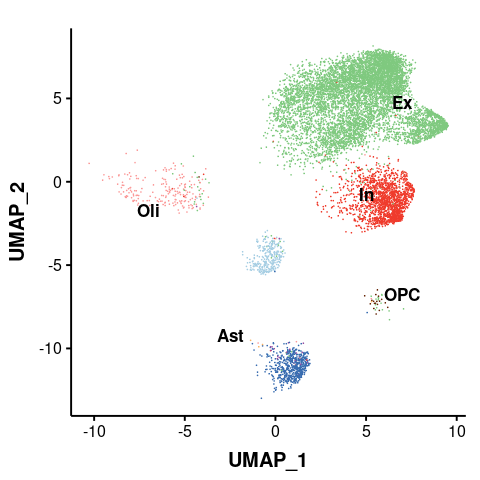

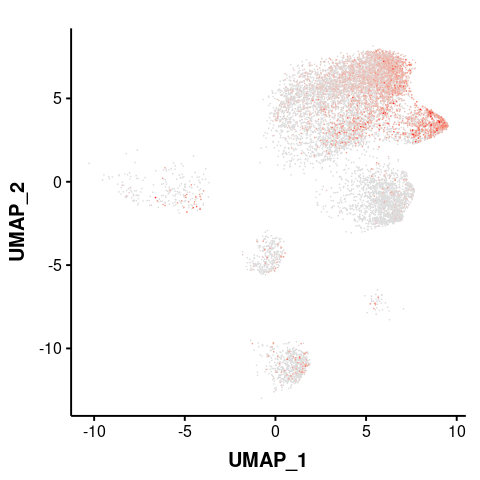

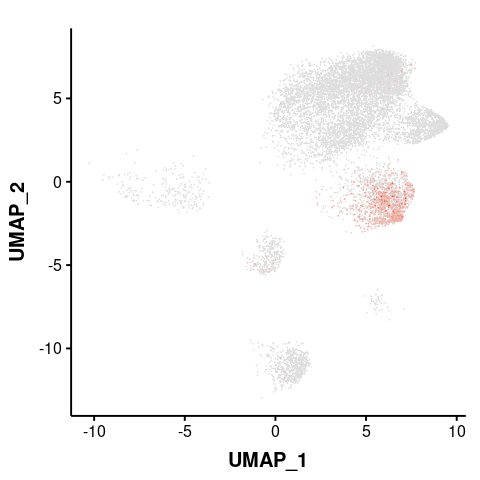

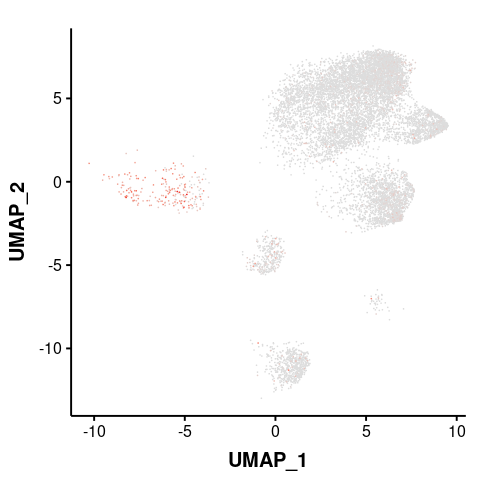

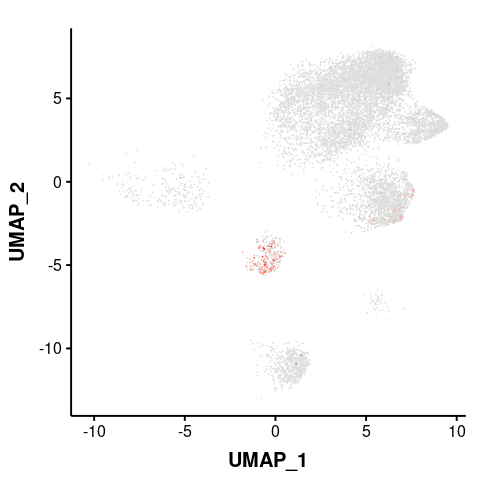

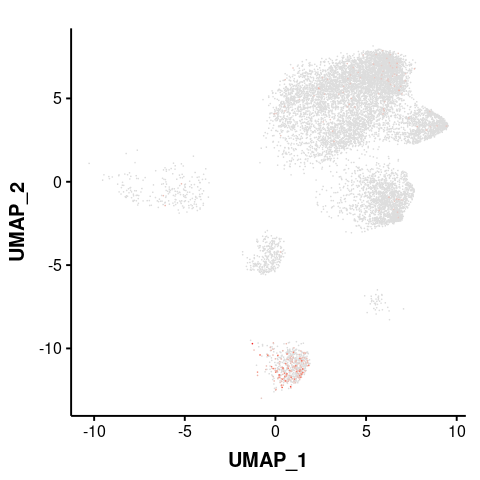

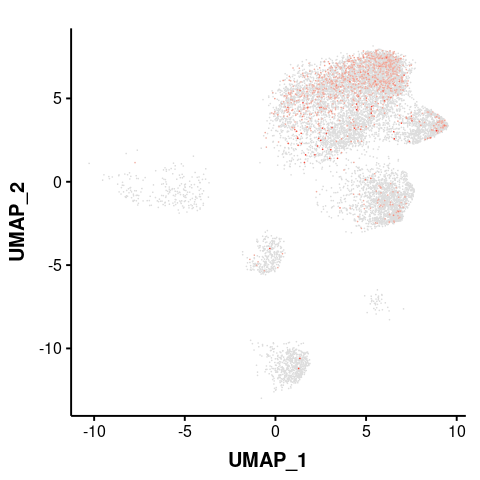

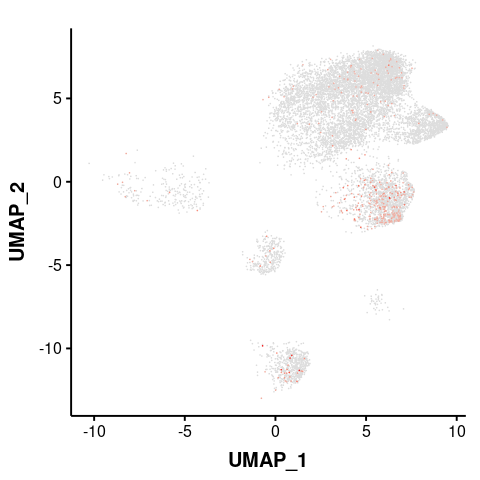

In [8]:
%%R
ps<-list()
df<-read.csv('../data/analysis/ctrls_ad3.1.txt',sep='\t',header=T,row.names=1)
ps[[length(ps)+1]]<-ggplot(df,aes(x=UMAP_1,y=UMAP_2))+geom_point(aes(color=predicted.celltype),size=0.01)+theme_Publication()+scale_colour_Publication()+theme(legend.position="none") + 
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))+
    annotate('text',x=7,y=4,label='atop(bold("Ex"))',size=6,parse=T)+
    annotate('text',x=5,y=-1.5,label='atop(bold("In"))',size=6,parse=T)+
    annotate('text',x=7,y=-7.5,label='atop(bold("OPC"))',size=6,parse=T)+
    annotate('text',x=-2.5,y=-10,label='atop(bold("Ast"))',size=6,parse=T)+
    annotate('text',x=-7,y=-2.5,label='atop(bold("Oli"))',size=6,parse=T)

df<-df[order(df$SLC17A7),]
ps[[length(ps)+1]]<-ggplot(df,aes(x=UMAP_1,y=UMAP_2))+geom_point(aes(color=SLC17A7),size=0.01)+theme_Publication()+scale_colour_gradientn(colors=c('#DDDDDD','#F22929',"#FF0000"))+theme(legend.position="none")+ 
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) 
df<-df[order(df$GAD1),]
ps[[length(ps)+1]]<-ggplot(df,aes(x=UMAP_1,y=UMAP_2))+geom_point(aes(color=GAD1),size=0.01)+theme_Publication()+scale_colour_gradientn(colors=c('#DDDDDD',"#F22929"))+theme(legend.position="none") + 
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) 

df<-df[order(df$MBP),]
ps[[length(ps)+1]]<-ggplot(df,aes(x=UMAP_1,y=UMAP_2))+geom_point(aes(color=MBP),size=0.01)+theme_Publication()+scale_colour_gradientn(colors=c('#DDDDDD',"#F22929"))+theme(legend.position="none") + 
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) 

df<-df[order(df$PDGFRA),]
ps[[length(ps)+1]]<-ggplot(df,aes(x=UMAP_1,y=UMAP_2))+geom_point(aes(color=PDGFRA),size=0.01)+theme_Publication()+scale_colour_gradientn(colors=c('#DDDDDD',"#F22929"))+theme(legend.position="none") + 
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) 

df<-df[order(df$AQP4),]
ps[[length(ps)+1]]<-ggplot(df,aes(x=UMAP_1,y=UMAP_2))+geom_point(aes(color=AQP4),size=0.01)+theme_Publication()+scale_colour_gradientn(colors=c('#DDDDDD',"#F22929"))+theme(legend.position="none") + 
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) 

df<-df[order(df$LTR86B2),]
ps[[length(ps)+1]]<-ggplot(df,aes(x=UMAP_1,y=UMAP_2))+geom_point(aes(color=LTR86B2),size=0.01)+theme_Publication()+scale_colour_gradientn(colors=c('#DDDDDD',"#F22929"))+theme(legend.position="none")+ 
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) 
df<-df[order(df$MER83B),]
ps[[length(ps)+1]]<-ggplot(df,aes(x=UMAP_1,y=UMAP_2))+geom_point(aes(color=MER83B),size=0.01)+theme_Publication()+scale_colour_gradientn(colors=c('#DDDDDD',"#F22929"))+theme(legend.position="none") + 
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) 

pdf('../data/analysis/figures/cell_marker_rte_umap_ad3.1.pdf')
for(p in ps){
    plot(p)
}
dev.off()
for(p in ps){
    plot(p)
}

In [ ]:
poe_tbl=[]
mean_exp_tabl=[]
for cell in ['Ex','In','Ast','Oli','OPC']:
    mean_exp_tabl.append([])
    poe_tbl.append([])
    for gene in list2:
        exp_val=adata[adata.obs['CellType']==cell].obs_vector(gene)
        poe_tbl[-1].append(np.sum(exp_val>0)/len(exp_val))
        mean_exp_tabl[-1].append(np.mean(exp_val))

mean_exp_tabl=pd.DataFrame(mean_exp_tabl,columns=list2,index=['Ex','In','Ast','Oli','OPC'])
mean_exp_tabl=mean_exp_tabl.astype(float).apply(zscore)
poe_tbl=pd.DataFrame(poe_tbl,columns=list2,index=['Ex','In','Ast','Oli','OPC']).astype(float)
expanded_tbl=[]
for i in range(len(mean_exp_tabl.index)):
    for j in range(len(mean_exp_tabl.columns)):
        expanded_tbl.append([mean_exp_tabl.index[i],mean_exp_tabl.columns[j],mean_exp_tabl.iloc[i,j],poe_tbl.iloc[i,j]])
expanded_tbl=pd.DataFrame(expanded_tbl,columns=['Cell','Gene','zscore','PoE'])
expanded_tbl.to_csv('../data/analysis/cell_marker_rte_ad3.1.csv', index=False)

In [ ]:
%%R
df<-read.csv('../data/analysis/cell_marker_rte_ad3.1.csv')
df$Gene<-factor(df$Gene,levels=c('AluJo','AluJb','AluYa5','AluJr','AluYb8','L1PBa','L1PA8A','L1MA3','L1M3d','LTR86B2','MER83B','L1M5','HERVH-int','MER31-int','MamGypLTR2c','L1MC2','L1HS','AluSx'))
p<-ggplot(df, aes(x=Gene, y=Cell, color=zscore,size=PoE))+geom_point() +theme_Publication()+xlab('RTE')+scale_color_gradientn(colors = c("blue", "white", "red"))+scale_size(range = c(1, 20))+
theme(axis.text.x = element_text(angle = 60, hjust = 1))
print(p)
pdf('../data/analysis/figures/cell_marker_rte_scatter_ad3.1.pdf',width=15,height=10)
print(p)
dev.off()

### Find markers in all control samples (except midbrain samples MS01 and PD01)

In [ ]:
rtes=[x for x in te_cls.keys() if te_cls[x] in ['LTR','LINE','SINE']]
from scipy.stats import zscore
for dataset in all_dfs:
    if dataset in ['MS_HS_00001','MS_HS_00002','PD_HS_00001','PD_HS_00002']:
        continue
    print(dataset, end=', ')
    # if os.path.isfile(f'../data/analysis/{dataset}_rank_rte_groups.csv'):
    #     continue
    sfg_ad=all_dfs[dataset].copy()
    sfg_umap=all_cell_umaps[dataset].copy()

    sfg_ad['Diagnosis']=sfg_umap['Diagnosis']
    sfg_ad['predicted.celltype']=sfg_umap['predicted.celltype']
    sfg_ad['UMAP_1']=sfg_umap['UMAP_1']
    sfg_ad['UMAP_2']=sfg_umap['UMAP_2']

    ctrls=sfg_ad.loc[sfg_ad['Diagnosis']=='Control',:]
    # ctrls[['SLC17A7','GAD1','MBP','PDGFRA','AQP4','LTR86B2','MER83B','UMAP_1','UMAP_2','predicted.celltype']].to_csv(f'../data/analysis/{dataset}_ctrls_markergene.txt',sep='\t',header=True,index=True)

    ctrls_rtes=ctrls.loc[:,[x for x in ctrls.columns if x in rtes]]
    ctrls_rtes=pd.concat([ctrls_rtes,ctrls[['Diagnosis','predicted.celltype','UMAP_1','UMAP_2']]],axis=1)

    ### Combine neuron cell types
    ctrls_rtes.loc[ctrls_rtes['predicted.celltype']=='Ex','predicted.celltype']='Neuron'
    ctrls_rtes.loc[ctrls_rtes['predicted.celltype']=='In','predicted.celltype']='Neuron'  
    ctrls_rtes=ctrls_rtes.loc[ctrls_rtes['predicted.celltype']!='Endo',:]
    ctrls_rtes=ctrls_rtes.loc[ctrls_rtes['predicted.celltype']!='Mic',:]
    ctrls_rtes=ctrls_rtes.loc[ctrls_rtes['predicted.celltype']!='VLMC',:]
    
    adata_rtes=anndata.AnnData(X=ctrls_rtes.iloc[:,:-4])
    adata_rtes.obs['Diagnosis']=ctrls_rtes['Diagnosis']
    adata_rtes.obs['CellType']=ctrls_rtes['predicted.celltype']
    adata_rtes.obsm['X_umap']=ctrls_rtes[['UMAP_1','UMAP_2']].to_numpy()
    adata_rtes.var["mito"] = adata_rtes.var_names.str.startswith("MT-")
    adata_rtes.layers["counts"] = adata_rtes.X.copy()
    sc.pp.calculate_qc_metrics(adata_rtes, qc_vars=["mito"], inplace=True)
    sc.pp.normalize_total(adata_rtes, target_sum=1e4)
    sc.pp.log1p(adata_rtes)

    sc.tl.rank_genes_groups(adata_rtes, 'CellType', method='t-test')
    pd.DataFrame(adata_rtes.uns['rank_genes_groups']['names']).to_csv(f'../data/analysis/{dataset}_rank_rte_groups.csv',index=False)

idx=rtes
cells=['Ast','Neuron','Oli','OPC']
rank_table=pd.DataFrame(np.zeros((len(idx),len(cells))),index=idx,columns=cells)
for dataset in all_dfs.keys():
    if dataset in ['MS_HS_00001','MS_HS_00002','PD_HS_00001']:
        continue
    print(dataset,end=', ')
    df=pd.read_csv(f'../data/analysis/{dataset}_rank_rte_groups.csv')
    df=df.loc[:,cells]
    for cell in cells:
        for i in range(len(df.index)):
            rank_table.loc[df[cell][i],cell]+=i
        for rte in idx:
            if rte not in list(df[cell]):
                rank_table.loc[rte,cell]+=len(df.index)

markers=[]
marker_fams=[]
marker_cls=[]
used=[]
for cell in cells:
    rank_table.sort_values(by=cell,ascending=True,inplace=True)
    tmp_list=[]
    for x in rank_table.index:
        if x not in used:
            tmp_list.append(x)
            used.append(x)
        if len(tmp_list)==20:
            break
    markers.append(tmp_list)
    marker_fams.append([te_fam[x] for x in tmp_list])
    marker_cls.append([te_cls[x] for x in tmp_list])
    
markers=pd.DataFrame(markers,index=cells).transpose()
marker_fams=pd.DataFrame(marker_fams,index=cells).transpose()
marker_cls=pd.DataFrame(marker_cls,index=cells).transpose()
markers.to_csv('../data/analysis/cell_type_rte_markers.csv',sep='\t',index=False)
marker_fams.to_csv('../data/analysis/cell_type_rte_marker_fams.csv',sep='\t',index=False)
marker_cls.to_csv('../data/analysis/cell_type_rte_marker_cls.csv',sep='\t',index=False)

rank_neuron=[]
for dataset in all_dfs.keys():
    if dataset in ['MS_HS_00001','MS_HS_00002','PD_HS_00001']:
        continue
    print(dataset,end=', ')
    df=pd.read_csv(f'../data/analysis/{dataset}_rank_rte_groups.csv')
    rank_neuron.append(df['Neuron'].tolist())
rank_neuron=pd.DataFrame(rank_neuron).transpose()
rank_neuron.to_csv('../data/analysis/rte_rank_neuron.csv',sep='\t',index=False)

signatures=list(set(markers.to_numpy().reshape(-1).tolist()))

signatures.extend(['L1PA8','L1M2','L1MC3','L1ME5','L1MD2','L1MA8','L1MA2','L1MC4','SYT1','SNAP25','GRIN1','SLC17A7','GAD1','MBP','PDGFRA','AQP4','UMAP_1','UMAP_2','predicted.celltype'])
rtes=[x for x in te_cls.keys() if te_cls[x] in ['LTR','LINE','SINE']]

for dataset in all_dfs:
    if dataset in ['MS_HS_00001','MS_HS_00002','PD_HS_00001','PD_HS_00002']:
        continue
    print(dataset, end=', ')
    sfg_ad=all_dfs[dataset].copy()
    sfg_umap=all_cell_umaps[dataset].copy()

    sfg_ad['Diagnosis']=sfg_umap['Diagnosis']
    sfg_ad['predicted.celltype']=sfg_umap['predicted.celltype']
    sfg_ad.loc[sfg_ad['predicted.celltype']=='Ex','predicted.celltype']='Neuron'
    sfg_ad.loc[sfg_ad['predicted.celltype']=='In','predicted.celltype']='Neuron'  
    sfg_ad=sfg_ad.loc[sfg_ad['predicted.celltype']!='Endo',:]
    sfg_ad=sfg_ad.loc[sfg_ad['predicted.celltype']!='Mic',:]
    sfg_ad=sfg_ad.loc[sfg_ad['predicted.celltype']!='VLMC',:]
    sfg_ad['UMAP_1']=sfg_umap['UMAP_1']
    sfg_ad['UMAP_2']=sfg_umap['UMAP_2']

    ctrls=sfg_ad.loc[sfg_ad['Diagnosis']=='Control',:]
    ctrls[signatures].to_csv(f'../data/analysis/{dataset}_ctrls_signatures.txt',sep='\t',header=True,index=True)

    signature_exp=ctrls[signatures].copy()
    sigexp_summary=[]
    for cell in cells:
        for rte in signatures[:-19]:
            values=signature_exp.loc[signature_exp['predicted.celltype']==cell,rte]
            if type(values)==pd.core.frame.DataFrame:
                values=values.iloc[0,:]
            sigexp_summary.append([cell,rte,np.mean(values),np.sum(values>0)/len(values)])
    df=pd.DataFrame(sigexp_summary,columns=['Cell','RTE','Mean','PoE'])
    df['zscore']=df.groupby('RTE')['Mean'].transform(zscore)
    df.to_csv(f'../data/analysis/{dataset}_ctrls_signatures_summary.csv',index=False)

In [ ]:
%%R
# df<-read.csv('../data/analysis/AD_HS_00003.1_ctrls_signatures.txt',sep='\t',header=T)

ps<-list()
markers<-c('L1M3d','MER31B','MER101B','HUERS.P2.int')
cells<-c('Neuron','Oli','OPC','Ast')
for(i in seq(1:4) ){
    df_tmp<-df
    df_tmp$Cell<-'TBA'
    print(cells[i])
    # df_tmp<-df_tmp[df_tmp[markers[i]]>0,]
    df_tmp[df_tmp$predicted.celltype==cells[i],'Cell']<-cells[i]
    df_tmp[df_tmp$predicted.celltype!=cells[i],'Cell']<-'Others'
    p1<-ggplot(df_tmp)+geom_violin(aes_string(x='Cell',y=markers[i],fill='Cell'))+theme_Publication()+theme(legend.position='none')+ggtitle(paste0(cells[i],' - ',markers[i]))
    ps[[length(ps)+1]]<-p1
}
for(p in ps){
    plot(p)
}

pdf('../data/analysis/figures/ctrls_signatures_violin_ad3.1.pdf',width=7,height=10)
for(p in ps){
    plot(p)
}
dev.off()

In [ ]:
%%R
markers<-read.csv('../data/analysis/cell_type_rte_markers.csv',sep='\t')
markers_level<-c()
for(cell in colnames(markers)){
    markers_level<-c(markers_level,markers[,cell])
}

fams<-read.csv('../data/analysis/cell_type_rte_marker_fams.csv',sep='\t')
fams_level<-c()
for(cell in colnames(fams)){
    fams_level<-c(fams_level,fams[,cell])
}

cls<-read.csv('../data/analysis/cell_type_rte_marker_cls.csv',sep='\t')
cls_level<-c()
for(cell in colnames(cls)){
    cls_level<-c(cls_level,cls[,cell])
}

cls_anno<-data.frame(RTE=markers_level,Family=fams_level,Class=cls_level)
hanno<-HeatmapAnnotation(Family=cls_anno$Family,Class=cls_anno$Class)
pdf('../data/analysis/figures/rowannotation.pdf',width=15,height=10)
draw(hanno)

dev.off()
markers_level<-unique(markers_level)

pdf('../data/analysis/figures/global_cell_type_marker_rte_scatter.pdf',width=20,height=7)

for(dataset in c('AD_HS_00001', 'AD_HS_00002', 'AD_HS_00003.1', 'AD_HS_00003.2', 'AD_HS_00004', 'AD_HS_00005', 'AD_HS_00006', 'AD_HS_00007', 'AD_HS_00008')){
    df<-read.csv(paste0('../data/analysis/',dataset,'_ctrls_signatures_summary.csv'))
    df<-df[df$RTE %in% markers_level,]
    df$RTE<-factor(df$RTE,levels=markers_level)
    df$Cell<-factor(df$Cell,levels=c('Ast','Neuron','Oli','OPC'))
    p<-ggplot(df, aes(x=RTE, y=Cell, color=zscore,size=PoE))+geom_point() +theme_Publication()+xlab('RTE')+scale_color_gradientn(colors = c("blue", "white", "red"))+scale_size(range = c(1, 10))+
    theme(axis.text.x = element_text(angle = 60, hjust = 1))+ggtitle(dataset)
    print(p)
}
dev.off()

### Example of noisy nature of RTE

In [ ]:
%%R
ps<-list()
p<-NULL
# 'L1PA8','L1M2','L1MC3','L1ME5','L1MD2','L1MA8','L1MA2','L1MC4'
for(dataset in c('AD_HS_00001',  'AD_HS_00003.2')){
    df<-read.csv(paste0('../data/analysis/',dataset,'_ctrls_signatures.txt'),sep='\t',header=T,row.names=1)
    ps[[length(ps)+1]]<-ggplot(df,aes(x=UMAP_1,y=UMAP_2))+geom_point(aes(color=predicted.celltype),size=.5)+theme_Publication()+scale_colour_Publication()+#theme(legend.position="none") + 
        theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +ggtitle(dataset)
    df<-df[order(df$L1MD2),]
    ps[[length(ps)+1]]<-ggplot(df,aes(x=UMAP_1,y=UMAP_2))+geom_point(aes(color=L1MD2),size=.5)+theme_Publication()+scale_colour_gradientn(colors=c('#DDDDDD','#F22929',"#FF0000"))+theme(legend.position="none")+ 
        theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +ggtitle(dataset)
    
    df$Group<-dataset
    df$Cell<-df$predicted.celltype
    df[df$Cell!='Neuron','Cell']<-'Non_Neuron'
    if(is.null(p)){
        p<-ggplot(df,aes(x=Group,y=L1MD2,group=Cell,fill=Cell))+geom_boxplot()
    }else{
        p<-p+ geom_boxplot(data=df,aes(x=Group,y=L1MD2,group=Cell,fill=Cell))
    }
}
p<-p+theme_Publication()+ylim(0,50)
ps[[length(ps)+1]]<-p
pdf('../data/analysis/figures/ctrls_ad1_ad3.2.pdf',width=7,height=7)
for(p in ps){
    plot(p)
}
dev.off()
for(p in ps){
    plot(p)
}

### UMAP of marker RTEs in AD1

In [ ]:
%%R
ps<-list()
df<-read.csv('../data/analysis/AD_HS_00001_ctrls_signatures.txt',sep='\t',header=T,row.names=1)
ps[[length(ps)+1]]<-ggplot(df,aes(x=UMAP_1,y=UMAP_2))+geom_point(aes(color=predicted.celltype),size=.5)+theme_Publication()+scale_colour_Publication()+
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))

df<-df[order(df$SYT1),]
ps[[length(ps)+1]]<-ggplot(df,aes(x=UMAP_1,y=UMAP_2))+geom_point(aes(color=SYT1),size=.5)+theme_Publication()+scale_colour_gradientn(colors=c('#DDDDDD','#F22929',"#FF0000"))+theme(legend.position="none")+ 
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +ggtitle('SYT1')

df<-df[order(df$MBP),]
ps[[length(ps)+1]]<-ggplot(df,aes(x=UMAP_1,y=UMAP_2))+geom_point(aes(color=MBP),size=0.5)+theme_Publication()+scale_colour_gradientn(colors=c('#DDDDDD',"#F22929","#FF0000"))+theme(legend.position="none") + 
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +ggtitle('MBP')

df<-df[order(df$PDGFRA),]
ps[[length(ps)+1]]<-ggplot(df,aes(x=UMAP_1,y=UMAP_2))+geom_point(aes(color=PDGFRA),size=0.5)+theme_Publication()+scale_colour_gradientn(colors=c('#DDDDDD',"#F22929","#FF0000"))+theme(legend.position="none") + 
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +ggtitle('PDGFRA')

df<-df[order(df$AQP4),]
ps[[length(ps)+1]]<-ggplot(df,aes(x=UMAP_1,y=UMAP_2))+geom_point(aes(color=AQP4),size=0.5)+theme_Publication()+scale_colour_gradientn(colors=c('#DDDDDD',"#F22929","#FF0000"))+theme(legend.position="none") + 
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +ggtitle('AQP4')

df<-df[order(df$L1M3d),]
ps[[length(ps)+1]]<-ggplot(df,aes(x=UMAP_1,y=UMAP_2))+geom_point(aes(color=L1M3d),size=0.5)+theme_Publication()+scale_colour_gradientn(colors=c('#DDDDDD',"#F22929","#FF0000"))+theme(legend.position="none")+ 
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +ggtitle('L1M3d')

df<-df[order(df$MER31B),]
ps[[length(ps)+1]]<-ggplot(df,aes(x=UMAP_1,y=UMAP_2))+geom_point(aes(color=MER31B),size=0.5)+theme_Publication()+scale_colour_gradientn(colors=c('#DDDDDD',"#F22929","#FF0000"))+theme(legend.position="none") + 
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +ggtitle('MER31B')

df<-df[order(df$MER101B),]
ps[[length(ps)+1]]<-ggplot(df,aes(x=UMAP_1,y=UMAP_2))+geom_point(aes(color=MER101B),size=.1)+theme_Publication()+scale_colour_gradientn(colors=c('#DDDDDD','#F22929',"#FF0000"))+theme(legend.position="none")+ 
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))  +ggtitle('MER101B')

df<-df[order(df$HUERS.P2.int),]
ps[[length(ps)+1]]<-ggplot(df,aes(x=UMAP_1,y=UMAP_2))+geom_point(aes(color=HUERS.P2.int),size=0.5)+theme_Publication()+scale_colour_gradientn(colors=c('#DDDDDD',"#F22929","#FF0000"))+theme(legend.position="none") + 
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +ggtitle('HUERS-P2-int')

pdf('../data/analysis/figures/cell_rte_markers_ad1.pdf',width=7,height=7)
for(p in ps){
    plot(p)
}
dev.off()
for(p in ps){
    plot(p)
}